# Objectives 
YWBAT
* calculate bayesian stats in Python
* explain how this leads to ML and DL
* explain what a prior probability is

# Outline
* load in the iris dataset! 
* plot some histograms
* answer some bayesian stats questions on the data
* discussion

In [16]:
import warnings
warnings.filterwarnings('ignore') 


import pandas as pd
import numpy as np

from sklearn.datasets import load_iris 


import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# this is a magic command
# it will run plt.show() for you
%matplotlib inline

In [12]:
# # run if you need to create and save iris_dataset
# iris = load_iris()
# data = iris.data
# target = iris.target
# feature_names = iris.feature_names # column names
# target_names = iris.target_names
# target_names_array = [target_names[i] for i in target]
# df = pd.DataFrame(data=data, columns=feature_names)
# df['target']=target_names_array
# df.head()
# df.to_csv("../data/iris.csv", index=False)

# Reload in data

In [13]:
df = pd.read_csv("../data/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


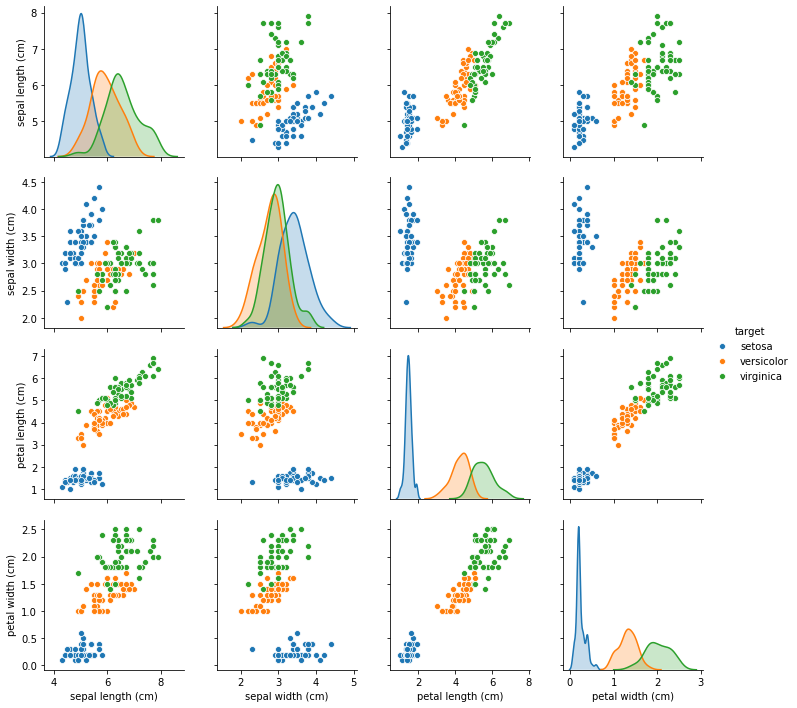

In [18]:
sns.pairplot(data=df, hue='target')
plt.show()

# Let's answer some Bayesian Statistics

In [22]:
df['is_setosa'] = df['target'].apply(lambda x: 'setosa' if x=='setosa' else 'not_setosa')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,is_setosa
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


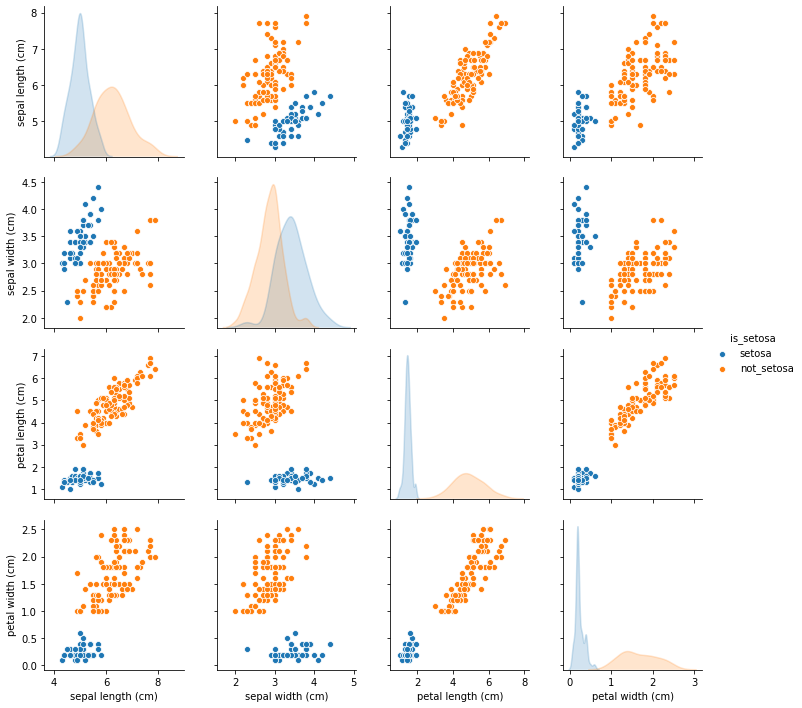

In [40]:
sns.pairplot(data=df.drop(columns=['target']), 
             hue='is_setosa',
             diag_kws={"alpha":0.2})
plt.show()

### What is P(flower=setosa|sepal length < 6 cm)?

<img src="../images/bayes-theorem.svg" />

In [43]:
df_sl_under_6 = df.loc[df['sepal length (cm)']<6]

# now I have all the flowers under 6 cm petal length

# num_setosas under 6 cm / all flowers under 6 cm?

In [44]:
df_sl_under_6.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,is_setosa
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [45]:
# number of setosas
num_setosas_under_6 = df_sl_under_6.loc[df_sl_under_6['target']=='setosa'].shape[0]
num_setosas_under_6

all_flowers_under_6 = df_sl_under_6.shape[0]

num_setosas_under_6/all_flowers_under_6

0.6024096385542169

In [46]:
df_sl_under_6['is_setosa'].value_counts(normalize=True)

setosa        0.60241
not_setosa    0.39759
Name: is_setosa, dtype: float64

### Therefore P(flower=setosa|sepal length < 6 cm) = 0.60

##  Let's say we have to build a machine learning model that takes in a row of data and spits out a predicted flower type? 

In [47]:
{"petal length (cm)":3, "sepal length": 5}

{'petal length (cm)': 3, 'sepal length': 5}

In [49]:
# P(target=setosa | petal length = 3)
# P(target=versicolor | petal length = 3)
# P(target=viginica | petal length = 3)

In [50]:
from sklearn.datasets import make_circles

In [51]:
X, y = make_circles()

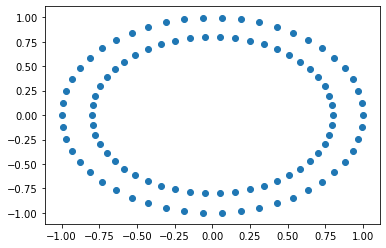

In [57]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# What did we learn? 
* data can be put in a circle
* all the irises are purple
* how to read a pairplot 
* the use of a pairplot
* high dimensional splitting stuff
* scikit learn datasets
* `df[col].value_counts(normalize=True)`
    * This can give you probability
* rule of thumb, if it's too confusing use Bayes Theorem 